In [1]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt

sys.path.append('../')

from examples.test_robot_navigation import main
from evaluations import gaussian_cdf_evaluation

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
true_state_history, estimate_state_history, particle_history = main(seed=2, save_particles=True, num_iters=100)

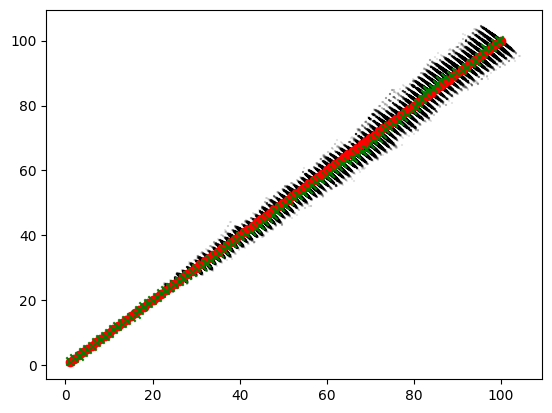

In [21]:
fig, ax = plt.subplots()
for i in range(100):
    ax.scatter(particle_history[i][:, 0], particle_history[i][:, 1], s=1, marker="+", label=str(i), alpha=0.1, color="k")
    ax.scatter(true_state_history[i][0], true_state_history[i][1], color="red")
    ax.scatter(estimate_state_history[i][0][0], estimate_state_history[i][0][1], color="green", marker="x")

In [4]:
# changing the seed corrupts filtering performance

true_state_history, estimate_state_history, particle_history = main(seed=6, save_particles=True)

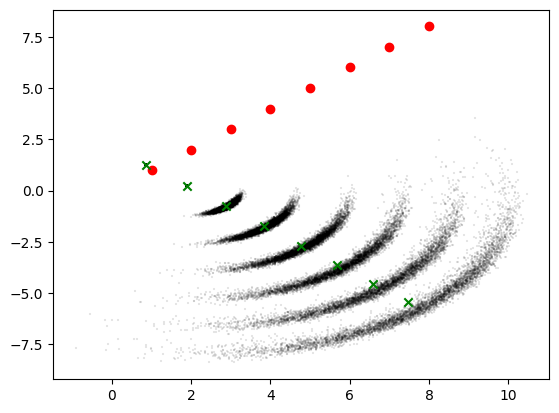

In [5]:
fig, ax = plt.subplots()
for i in range(8):
    ax.scatter(particle_history[i][:, 0], particle_history[i][:, 1], s=1, marker="+", label=str(i), alpha=0.1, color="k")
    ax.scatter(true_state_history[i][0], true_state_history[i][1], color="red")
    ax.scatter(estimate_state_history[i][0][0], estimate_state_history[i][0][1], color="green", marker="x")

In [10]:
# using Gaussian initialisation around the initial state

true_state_history, estimate_state_history, particle_history = main(seed=6, init="gaussian", save_particles=True, num_iters=200, num_particles=50000)

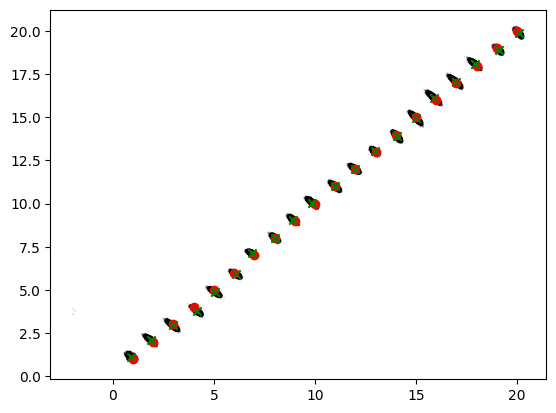

In [11]:
fig, ax = plt.subplots()
for i in range(20):
    ax.scatter(particle_history[i][:, 0], particle_history[i][:, 1], s=1, marker="+", label=str(i), alpha=0.1, color="k")
    ax.scatter(true_state_history[i][0], true_state_history[i][1], color="red")
    ax.scatter(estimate_state_history[i][0][0], estimate_state_history[i][0][1], color="green", marker="x")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


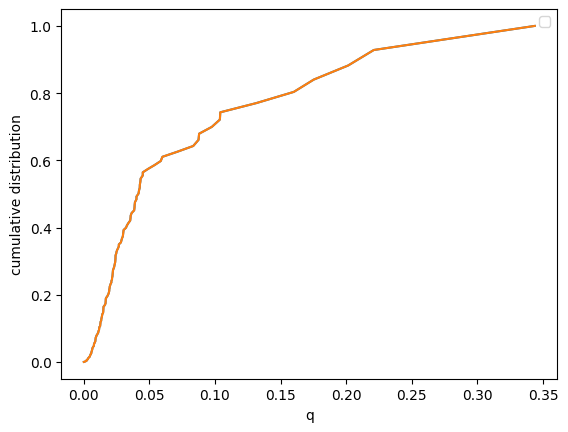

In [12]:
particle_history_loc = [arr[:, :-1] for arr in particle_history]
gaussian_cdf_evaluation(particle_history_loc, true_state_history)